# **Análisis de resultados**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

import urllib.request
import pickle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
RANDOM_STATE = 10

## **Carga de datos preprocesados**

In [ ]:
X = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/final/train-preprocessed.p").read()
    )
y = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/final/test-preprocessed.p").read()
    )

## **Carga de resultados de los modelos**

In [ ]:
reg_pred = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/regression/pred.p").read()
    )
reg_pred_proba = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/regression/pred-proba.p").read()
    )

In [ ]:
trees_pred = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/trees/pred.p").read()
    )
trees_pred_proba = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/trees/pred-proba.p").read()
    )

In [ ]:
kmeans_pred_train = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/kmeans/pred-train.p").read()
    )
kmeans_pred_test = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/kmeans/pred-test.p").read()
    )

## **Data split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## **Comparando resultados**

In [ ]:
def compute_metrics(y_true, y_pred, y_pred_proba = None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    if y_pred_proba is not None:
        return accuracy, precision, recall, f1, roc_auc_score(y_true, y_pred_proba)
    else:
        return accuracy, precision, recall, f1, np.NaN

In [ ]:
model_names = ["LogisticRegression", "RandomForestClassifier", "KMeans"]
y_pred_list = [reg_pred, trees_pred, kmeans_pred_train]
y_pred_proba_list = [reg_pred_proba, trees_pred_proba, None]

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "ROC AUC"])

for model_name, y_pred, y_pred_proba in zip(model_names, y_pred_list, y_pred_proba_list):
    accuracy, precision, recall, f1, roc = compute_metrics(y_test, y_pred, y_pred_proba)

    metrics_df.loc[len(metrics_df), metrics_df.columns] = model_name, accuracy, precision, recall, f1, roc

metrics_df = metrics_df.set_index("Model")
metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
LogisticRegression,0.614332,0.648352,0.522785,0.578837,0.671622
RandomForestClassifier,0.825027,0.802888,0.867932,0.834144,0.912173
KMeans,0.511658,0.512701,0.740928,0.60604,NaN


## **Curvas ROC**

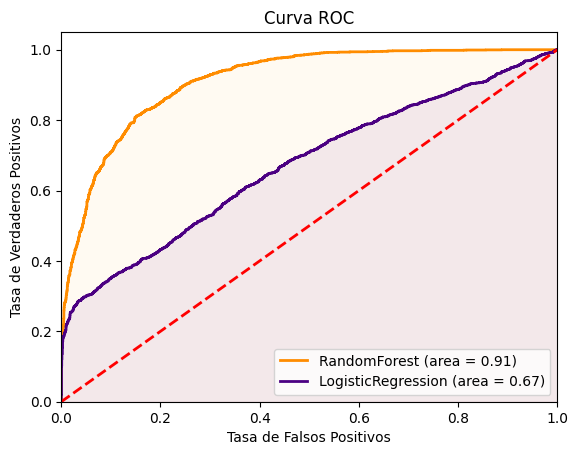

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, trees_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='RandomForest (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='papayawhip', alpha=0.3)

fpr, tpr, thresholds = roc_curve(y_test, reg_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='indigo', lw=2, label='LogisticRegression (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='thistle', alpha=0.3)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()